In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
df_jan = pd.read_csv(r'223PSC_Jan.csv', encoding='unicode_escape')
df_nov = pd.read_csv(r'223PSC_Nov.csv', encoding='unicode_escape')

In [3]:
df_jan.head()

,Cust,Customer Name,Group,Part Number,Description,Doc,Line,Date,Time,Qty,Unit,Disc%,Tot Goods
0,193750,ROCK AUTO LLC,ACD,ACD1,SPARK PLUG ASM-19307139,02V2077341,2,Jan 04 23,15:39,6,3.66,NaN,21.96
1,193750,ROCK AUTO LLC,ACD,ACD10477565,SEALO/PMP DRV(O RING)-104,02V2085767,6,Jan 12 23,16:46,1,2.34,NaN,2.34
2,193750,ROCK AUTO LLC,ACD,ACD10477565,SEALO/PMP DRV(O RING)-104,02V2089092,1,Jan 15 23,20:48,1,2.34,NaN,2.34
3,193750,ROCK AUTO LLC,ACD,ACD11M23,MOTOR KITFRT S/D WDO REG-,02V2096812,3,Jan 22 23,20:38,1,26.05,NaN,26.05
4,193750,ROCK AUTO LLC,ACD,ACD12337894,GASKETOIL FLTR ADAP-12337,02V2085767,3,Jan 12 23,16:46,1,0.08,NaN,0.08


In [4]:
df_nov.head()

,Cust,Customer Name,Group,Part Number,Description,Doc,Line,Date,Time,Qty,Unit,Disc%,Tot Goods
0,193750,ROCK AUTO LLC,ACD,ACD10070107,VALVEHTR AIR BL-10070107,02V2013956,2,Nov 16 22,16:42,1,8.09,NaN,8.09
1,193750,ROCK AUTO LLC,ACD,ACD11M23,MOTOR KITFRT S/D WDO REG-,02V2013309,3,Nov 16 22,16:35,1,26.05,NaN,26.05
2,193750,ROCK AUTO LLC,ACD,ACD12337894,GASKETOIL FLTR ADAP-12337,02V2022158,1,Nov 21 22,16:08,1,0.08,NaN,0.08
3,193750,ROCK AUTO LLC,ACD,ACD12494846,INDICATORWSWA SOLV LVL-12,02V1987660,1,Nov 02 22,16:04,1,17.55,NaN,17.55
4,193750,ROCK AUTO LLC,ACD,ACD12494846,INDICATORWSWA SOLV LVL-12,02V2016761,2,Nov 18 22,15:40,1,17.55,NaN,17.55


In [5]:
df_jan.drop(columns=['Cust', 'Customer Name', 'Description', 'Doc', 'Disc%'], inplace=True)

In [6]:
df_nov.drop(columns=['Cust', 'Customer Name', 'Description', 'Doc', 'Disc%'], inplace=True)

In [7]:
df_jan.head()

,Group,Part Number,Line,Date,Time,Qty,Unit,Tot Goods
0,ACD,ACD1,2,Jan 04 23,15:39,6,3.66,21.96
1,ACD,ACD10477565,6,Jan 12 23,16:46,1,2.34,2.34
2,ACD,ACD10477565,1,Jan 15 23,20:48,1,2.34,2.34
3,ACD,ACD11M23,3,Jan 22 23,20:38,1,26.05,26.05
4,ACD,ACD12337894,3,Jan 12 23,16:46,1,0.08,0.08


In [8]:
df_nov.head()

,Group,Part Number,Line,Date,Time,Qty,Unit,Tot Goods
0,ACD,ACD10070107,2,Nov 16 22,16:42,1,8.09,8.09
1,ACD,ACD11M23,3,Nov 16 22,16:35,1,26.05,26.05
2,ACD,ACD12337894,1,Nov 21 22,16:08,1,0.08,0.08
3,ACD,ACD12494846,1,Nov 02 22,16:04,1,17.55,17.55
4,ACD,ACD12494846,2,Nov 18 22,15:40,1,17.55,17.55


In [9]:
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46762 entries, 0 to 46761
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Group        46762 non-null  object 
 1   Part Number  46762 non-null  object 
 2   Line         46762 non-null  int64  
 3   Date         46762 non-null  object 
 4   Time         46762 non-null  object 
 5   Qty          46762 non-null  int64  
 6   Unit         46762 non-null  float64
 7   Tot Goods    46762 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 2.9+ MB


In [10]:
df_nov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66140 entries, 0 to 66139
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Group        66139 non-null  object 
 1   Part Number  66140 non-null  object 
 2   Line         66140 non-null  int64  
 3   Date         66140 non-null  object 
 4   Time         66140 non-null  object 
 5   Qty          66140 non-null  int64  
 6   Unit         66140 non-null  float64
 7   Tot Goods    66140 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 4.0+ MB


In [11]:
print(df_jan.duplicated().sum())
print(df_nov.duplicated().sum())

185
263


In [12]:
df_jan.drop_duplicates(inplace=True)
df_nov.drop_duplicates(inplace=True)

In [13]:
print(df_jan.isna().sum())
print(df_nov.isna().sum())

Group          0
Part Number    0
Line           0
Date           0
Time           0
Qty            0
Unit           0
Tot Goods      0
dtype: int64
Group          1
Part Number    0
Line           0
Date           0
Time           0
Qty            0
Unit           0
Tot Goods      0
dtype: int64


In [14]:
df_nov.dropna(inplace=True)

In [15]:
print(df_jan.isna().sum())
print(df_jan.duplicated().sum())
print(df_nov.isna().sum())
print(df_nov.duplicated().sum())

Group          0
Part Number    0
Line           0
Date           0
Time           0
Qty            0
Unit           0
Tot Goods      0
dtype: int64
0
Group          0
Part Number    0
Line           0
Date           0
Time           0
Qty            0
Unit           0
Tot Goods      0
dtype: int64
0


In [16]:
df_jan.rename(columns={'Part Number':'Part', 'Tot Goods':'Total'}, inplace=True)
df_nov.rename(columns={'Part Number':'Part', 'Tot Goods':'Total'}, inplace=True)

In [17]:
df_jan['Date'] = pd.to_datetime(df_jan['Date'])
df_nov['Date'] = pd.to_datetime(df_nov['Date'])

In [43]:
plot_df_jan = df_jan.set_index(['Group', 'Date'])
plot_df_nov = df_nov.set_index(['Group', 'Date'])

In [44]:
plot_df_jan

Part  Line   Time  Qty   Unit  Total
Group Date                                                   
ACD   2023-01-04         ACD1     2  15:39    6   3.66  21.96
      2023-01-12  ACD10477565     6  16:46    1   2.34   2.34
      2023-01-15  ACD10477565     1  20:48    1   2.34   2.34
      2023-01-22     ACD11M23     3  20:38    1  26.05  26.05
      2023-01-12  ACD12337894     3  16:46    1   0.08   0.08
...                       ...   ...    ...  ...    ...    ...
WST   2023-01-19   WSTSO-7591     1  16:43    1  31.58  31.58
      2023-01-12   WSTST-4989     1  16:31    2  25.08  50.16
      2023-01-25   WSTST-4989     1  16:14    2  25.08  50.16
      2023-01-18   WSTST-6960     1  15:36    2  31.14  62.28
      2023-01-19   WSTST-6960     1  16:42    2  31.14  62.28

[46577 rows x 6 columns]

In [63]:
skp_nov = plot_df_nov.groupby('Date').sum()
skp_jan = plot_df_jan.groupby('Date').sum()

display(skp_jan, skp_nov)

C:\Users\zachd\AppData\Local\Temp\ipykernel_105392\55739456.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  skp_nov = plot_df_nov.groupby('Date').sum()
C:\Users\zachd\AppData\Local\Temp\ipykernel_105392\55739456.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  skp_jan = plot_df_jan.groupby('Date').sum()


,Line,Qty,Unit,Total
Date,,,,
2023-01-02,2712,2905,48858.56,57565.60
2023-01-03,3416,3017,51858.34,59383.81
2023-01-04,892,937,15140.10,18769.01
2023-01-05,2498,2281,37475.87,45967.59
2023-01-06,1956,2097,32290.89,39912.22
2023-01-08,3907,4071,66155.10,80161.07
2023-01-09,1285,1188,15816.89,19938.69
2023-01-10,2180,2379,38585.73,48471.95
2023-01-11,3245,3688,61877.09,75338.45


,Line,Qty,Unit,Total
Date,,,,
2022-11-01,1723,1711,26203.25,31153.45
2022-11-02,5006,5528,81155.49,100635.34
2022-11-03,3804,4017,61331.35,73445.85
2022-11-04,4176,3978,59316.13,75284.93
2022-11-06,8703,9106,138863.11,166623.12
2022-11-07,4140,4334,62545.93,73697.94
2022-11-08,2907,2836,43742.98,52823.71
2022-11-09,5077,5048,79871.71,97867.05
2022-11-10,4057,4231,64023.32,78375.49


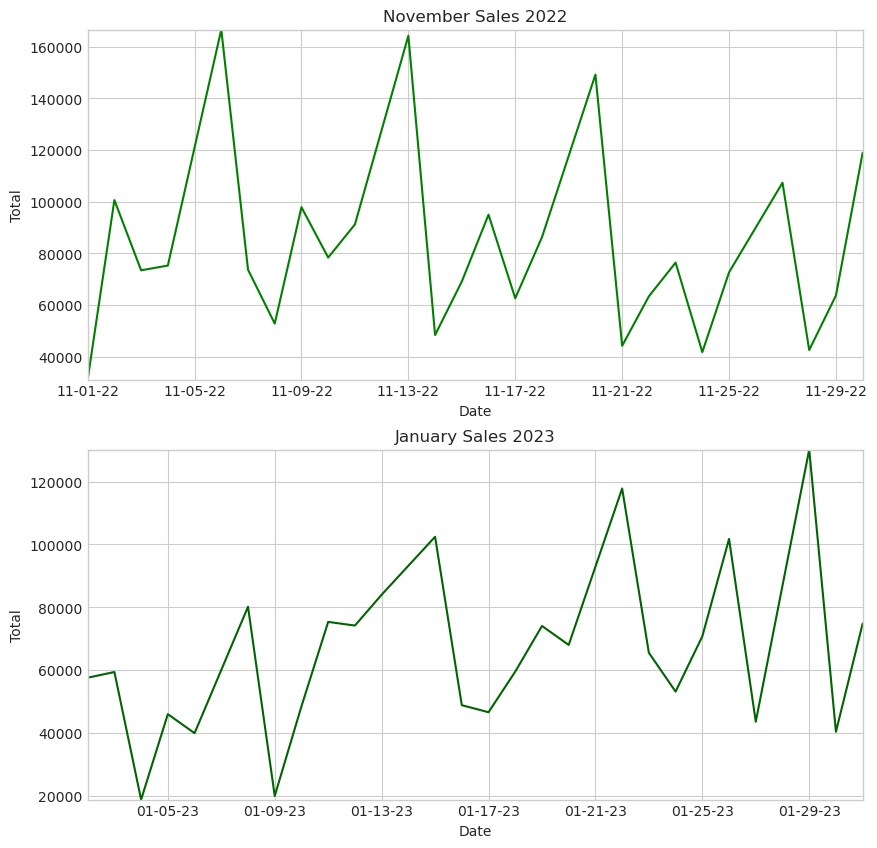

In [79]:
with plt.style.context('seaborn-whitegrid', 'seaborn-poster'):
    fig, ax = plt.subplots(2,1,figsize=(10,10))
    sns.lineplot(data=skp_nov, x=skp_nov.index, y='Total', ax=ax[0], color='green')
    ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
    ax[0].set_xlim(skp_nov.index.min(), skp_nov.index.max()) 
    ax[0].set_ylim(skp_nov['Total'].min(), skp_nov['Total'].max())
    ax[0].set_title('November Sales 2022')
    
    sns.lineplot(data=skp_jan, x=skp_jan.index, y='Total', ax=ax[1], color='darkgreen')
    ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
    ax[1].set_xlim(skp_jan.index.min(), skp_jan.index.max()) 
    ax[1].set_ylim(skp_jan['Total'].min(), skp_jan['Total'].max())
    ax[1].set_title('January Sales 2023')

plt.show()   